In [ ]:
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install pngcrush


In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean.cm as cm
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.img_tiles as cimgt
import glob
import json



In [ ]:
# import basemap



In [ ]:
ind = '201512'

In [ ]:
data.sea_surface_temperature_anomaly.values

In [ ]:
i=1

In [ ]:
data

In [ ]:
# cmaps = cm.cmap_d

# cm.tools.get_dict(cm.balance)


In [ ]:
255/2

In [ ]:
np.ma.masked_outside(dataElev.variables['elevation'],-1,5000)

da = data[variable_name]

<xarray.Dataset>
Dimensions:                          (time: 1, lat: 800, lon: 1280)
Coordinates:
  * time                             (time) datetime64[ns] 2022-02-28T12:00:00
  * lat                              (lat) float32 69.97 69.93 ... 30.08 30.02
  * lon                              (lon) float32 -174.0 -173.9 ... -110.0
Data variables:
    sea_surface_temperature_anomaly  (time, lat, lon) float32 nan nan ... nan
    mask                             (time, lat, lon) float32 4.0 4.0 ... 1.0
    crs                              (lon, lat) float64 -3.277e+04 ... -3.277...
Attributes: (12/58)
    acknowledgement:            NOAA Coral Reef Watch Program
    cdm_data_type:              Grid
    comment:                    This is a product of the NOAA Coral Reef Watc...
    contributor_name:           NOAA Coral Reef Watch Program
    contributor_role:           Collecting source data and deriving products;...
    Conventions:                CF-1.6, ACDD-1.3
    ...                

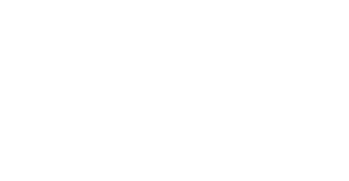

In [4]:
## Calc Monthly anomaly value for NE Pacific 
subfolder = 'ssta_monthly/'
nc_files = glob.glob(subfolder + '*.nc')
png_files = glob.glob(subfolder + '*.png')
remaining = set([x[:-2] for x in nc_files]) - set([y[:-3] for y in png_files])
files_to_open = [item + 'nc' for item in remaining]
# files_to_open = [item for item in nc_files]
get_latlong = True
res = 1
# ortho = ccrs.Orthographic(central_longitude=-139, central_latitude=32)
# ax = plt.axes(projection=ortho)
# ax = plt.axes(projection=ccrs.PlateCarree())
# Generate Map Image for each single netCDF

# fname = '2k_earth_daymap.jpg'
# img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)

min_lon = -174
max_lon = -110

min_lat = 30

max_lat = 70



# antimeridian fix
mmin_lon = 130
mmax_lon = 180

# northern lats
mmin_lat = 70
a = {}
def write_json(new_data, filename='monthly.json'):
    with open(filename,'r+') as file:
          # First we load existing data into a dict.
        file_data = json.load(file)
        # Join new_data with file_data inside emp_details
        file_data.update(new_data)
        # Sets file's current position at offset.
        file.seek(0)
        # convert back to json.
        json.dump(file_data, file, indent = 4)
        
# sort files
def last_4chars(x):
    return(x[-10:])

files = sorted(nc_files, key = last_4chars)  
for file in files[0:1]:
    file = 'ssta_monthly/ct5km_ssta-mean_v3.1_202202.nc'
    key = file[-9:-3]
    a.setdefault(key, [])

    with xr.open_dataset(file) as data:
        dataDub = data
        dataDub2 = data
        mask_lon = (data.lon >= min_lon) & (data.lon <= max_lon) #| ((data.lon >= mmin_lon) & (data.lon <= mmax_lon))
        mask_lat = (data.lat >= min_lat) & (data.lat <= max_lat)
#         mask_lon1 = (dataDub.lon >= mmin_lon) & (dataDub.lon <= mmax_lon)
#         mask_lat1 = (dataDub2.lat >= mmin_lat) & (dataDub2.lat <= max_lat)
        
        data = data.where(mask_lon & mask_lat, drop=True)
        
#         data1 = dataDub.where(mask_lon1 & mask_lat, drop=True)
        
#         data2 = dataDub2.where(mask_lat1, drop=True)
        print(data)
#         print(data2)

        temp = data.sea_surface_temperature_anomaly.values[0,::res,::res]
        Ta = (temp[~np.isnan(temp)].mean())
        print(Ta)
        a[key].append(float(Ta))
        write_json(a)

        lon = np.ma.masked_outside(data.lon.values[::res],  -180, 180)
        lat = np.ma.masked_outside(data.lat.values[::res],  -90, 90)

        fig = plt    
        ax = fig.axes(projection=ccrs.PlateCarree())        

        fig.axis('off')
        fig.margins(0,0)
        fig.gca().xaxis.set_major_locator(plt.NullLocator())
        fig.gca().yaxis.set_major_locator(plt.NullLocator())
        fig.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
        # ax.stock_img()
        
        
#         fig.pcolormesh(lons, lats, topo,vmin=0.1,vmax=10000,cmap='gray')
#         fig.pcolormesh(lon, lat, temp, vmin=-4, vmax=4,cmap=cm.balance)
#         fig.pcolormesh(lon1, lat1, temp1, vmin=-4, vmax=4,cmap=cm.balance)
#         fig.pcolormesh(lon2, lat2, temp2, vmin=-4, vmax=4,cmap=cm.balance)
#         ax.add_feature(cfeature.LAND,color='grey')
#         ax.set_facecolor([0.0, 1.0, 0.0, 0])
#         ax.imshow(img,extent=img_extent)
#         ax.set_extent([-180, 180, -90, 90])
        

#         fig.savefig(file[:-3]+'.png',transparent=True, dpi=200,bbox_inches='tight', pad_inches = 0)
# #         plt.close("all")
#         data.close()
#         fig.clf()
#         plt.close()


In [ ]:
subfolder = 'daily/2022/'
nc_files = glob.glob(subfolder + '*.nc')
png_files = glob.glob(subfolder + '*.png')
remaining = set([x[:-2] for x in nc_files]) - set([y[:-3] for y in png_files])
files_to_open = [item + 'nc' for item in remaining]
# files_to_open = [item for item in nc_files]
get_latlong = True
res = 1
# ortho = ccrs.Orthographic(central_longitude=-139, central_latitude=32)
# ax = plt.axes(projection=ortho)
# ax = plt.axes(projection=ccrs.PlateCarree())
# Generate Map Image for each single netCDF

# fname = '2k_earth_daymap.jpg'
# img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)

min_lon = -180
max_lon = -50

min_lat = -25

max_lat = 90



# antimeridian fix
mmin_lon = 130
mmax_lon = 180

# northern lats
mmin_lat = 70

# sort files
def last_4chars(x):
    return(x[-10:])

files = sorted(nc_files, key = last_4chars)  
for file in files[0:100]:
#     file = 'daily/2022/ct5km_ssta_v3.1_20220316.nc'

    with xr.open_dataset(file) as data:
        dataDub = data
        dataDub2 = data
        mask_lon = (data.lon >= min_lon) & (data.lon <= max_lon) #| ((data.lon >= mmin_lon) & (data.lon <= mmax_lon))
        mask_lat = (data.lat >= min_lat) & (data.lat <= max_lat)
        mask_lon1 = (dataDub.lon >= mmin_lon) & (dataDub.lon <= mmax_lon)
        mask_lat1 = (dataDub2.lat >= mmin_lat) & (dataDub2.lat <= max_lat)
        
        data = data.where(mask_lon & mask_lat, drop=True)
        
        data1 = dataDub.where(mask_lon1 & mask_lat, drop=True)
        
        data2 = dataDub2.where(mask_lat1, drop=True)
#         print(data1)
#         print(data2)
            
        #ax = plt.axes(projection=ccrs.PlateCarree())
        # ax.coastlines()
        temp = data.sea_surface_temperature_anomaly.values[0,::res,::res]
        temp1 = data1.sea_surface_temperature_anomaly.values[0,::res,::res]
        temp2 = data2.sea_surface_temperature_anomaly.values[0,::res,::res]
#         print(temp2)
#         if get_latlong : 
        lon = np.ma.masked_outside(data.lon.values[::res],  -180, 180)
        lat = np.ma.masked_outside(data.lat.values[::res],  -90, 90)
        lon1 = np.ma.masked_outside(data1.lon.values[::res],  -180, 180)
        lat1 = np.ma.masked_outside(data1.lat.values[::res],  -90, 90)
        lon2 = np.ma.masked_outside(data2.lon.values[::res],  -180, 180)
        lat2 = np.ma.masked_outside(data2.lat.values[::res],  -90, 90)
#             topo = np.ma.masked_outside(dataElev.variables['elevation'],0.1,5000)
#             lats = dataElev.variables['latitude'][:]
#             lons = dataElev.variables['longitude'][:]
#             get_latlong = False
        fig = plt    
        ax = fig.axes(projection=ccrs.PlateCarree())        

        fig.axis('off')
        fig.margins(0,0)
        fig.gca().xaxis.set_major_locator(plt.NullLocator())
        fig.gca().yaxis.set_major_locator(plt.NullLocator())
        fig.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
        # ax.stock_img()
        
        
#         fig.pcolormesh(lons, lats, topo,vmin=0.1,vmax=10000,cmap='gray')
        fig.pcolormesh(lon, lat, temp, vmin=-4, vmax=4,cmap=cm.balance)
        fig.pcolormesh(lon1, lat1, temp1, vmin=-4, vmax=4,cmap=cm.balance)
        fig.pcolormesh(lon2, lat2, temp2, vmin=-4, vmax=4,cmap=cm.balance)
#         ax.add_feature(cfeature.LAND,color='grey')
#         ax.set_facecolor([0.0, 1.0, 0.0, 0])
#         ax.imshow(img,extent=img_extent)
        ax.set_extent([-180, 180, -90, 90])
        

        fig.savefig(file[:-3]+'.png',transparent=True, dpi=200,bbox_inches='tight', pad_inches = 0)
#         plt.close("all")
        data.close()
        fig.clf()
        plt.close()


In [ ]:
## Create black and white texture for displacement map

subfolder = 'daily/201/'
nc_files = glob.glob(subfolder + '*.nc')
png_files = glob.glob(subfolder + '*.png')
remaining = set([x[:-2] for x in nc_files]) - set([y[:-3] for y in png_files])
files_to_open = [item + 'nc' for item in remaining]
# files_to_open = [item for item in nc_files]
get_latlong = True
res = 2
ortho = ccrs.Orthographic(central_longitude=-139, central_latitude=32)
# ax = plt.axes(projection=ortho)
ax = plt.axes(projection=ccrs.PlateCarree())
# Generate Map Image for each single netCDF

fname = '2k_earth_daymap.jpg'
img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)



for file in nc_files[0:1]:
    with xr.open_dataset('daily/2015/ct5km_ssta_v3.1_20150702.nc') as data:
        #ax = plt.axes(projection=ccrs.PlateCarree())
        # ax.coastlines()
        temp = data.sea_surface_temperature_anomaly.values[0,::res,::res]
        if get_latlong : 
            lon = np.ma.masked_outside(data.lon.values[::res],  -180, 180)
            lat = np.ma.masked_outside(data.lat.values[::res],  -90, 90)
            topo = np.ma.masked_outside(dataElev.variables['elevation'],0.1,5000)
            lats = dataElev.variables['latitude'][:]
            lons = dataElev.variables['longitude'][:]
            get_latlong = False
        fig = plt    
#         ax = fig.axes(projection=ortho)

        fig.axis('off')
        fig.margins(0,0)
        fig.gca().xaxis.set_major_locator(plt.NullLocator())
        fig.gca().yaxis.set_major_locator(plt.NullLocator())
        fig.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
        # ax.stock_img()
        
        
        fig.pcolormesh(lons, lats, topo,vmin=.01,vmax=10000,cmap='gray')
#         fig.pcolormesh(lon, lat, temp, vmin=-4, vmax=4,cmap=cm.gray)
#         ax.add_feature(cfeature.LAND,color='grey')
        ax.set_facecolor([0.4416302300065532, 0.43973773571730596, 0.4376579437864427])
#         ax.imshow(img,extent=img_extent)
        

        fig.savefig(file[:-3]+'.png', dpi=500, facecolor=ax.get_facecolor(),bbox_inches='tight', pad_inches = 0)
#         plt.close("all")
        data.close()
        fig.clf()
        plt.close()


In [ ]:
### HIGH RES background map with tranparent background
subfolder = 'daily/2015/'
nc_files = glob.glob(subfolder + '*.nc')
png_files = glob.glob(subfolder + '*.png')
remaining = set([x[:-2] for x in nc_files]) - set([y[:-3] for y in png_files])
files_to_open = [item + 'nc' for item in remaining]
# files_to_open = [item for item in nc_files]
get_latlong = True
res = 1
# ortho = ccrs.Orthographic(central_longitude=-139, central_latitude=32)
# ax = plt.axes(projection=ortho)
# ax = plt.axes(projection=ccrs.PlateCarree())
# Generate Map Image for each single netCDF

fname = '2k_earth_daymap.jpg'
img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)

min_lon = -180
max_lon = -50

min_lat = -20

max_lat = 90



# antimeridian fix
mmin_lon = 120
mmax_lon = 180

# northern lats
mmin_lat = 60
data = dataElev
dataDub = dataElev
dataDub2 = dataElev
mask_lon = (data.longitude >= min_lon) & (data.longitude <= max_lon) #| ((data.lon >= mmin_lon) & (data.lon <= mmax_lon))
mask_lat = (data.latitude >= min_lat) & (data.latitude <= max_lat)
mask_lon1 = (dataDub.longitude >= mmin_lon) & (dataDub.longitude <= mmax_lon)
mask_lat1 = (dataDub2.latitude >= mmin_lat) & (dataDub2.latitude <= max_lat)

data = data.where(mask_lon & mask_lat, drop=True)

data1 = dataDub.where(mask_lon1 & mask_lat, drop=True)

data2 = dataDub2.where(mask_lat1, drop=True)

# for file in nc_files[1:2]:
#     with xr.open_dataset('daily/2015/ct5km_ssta_v3.1_20150702.nc') as data1:
        #ax = plt.axes(projection=ccrs.PlateCarree())
        # ax.coastlines()
#         temp = data.sea_surface_temperature_anomaly.values[0,::res,::res]
#         if get_latlong : 
#             lon = np.ma.masked_outside(data.lon.values[::res],  -180, 180)
#             lat = np.ma.masked_outside(data.lat.values[::res],  -90, 90)
#             topo = np.ma.masked_outside(dataElev.variables['elevation'],0.1,9000)
topo = np.ma.masked_outside(data.variables['elevation'],0.1,9000)
topo1 = np.ma.masked_outside(data1.variables['elevation'],0.1,9000)
topo2 = np.ma.masked_outside(data2.variables['elevation'],0.1,9000)
#             lats = dataElev.variables['latitude'][:]
#             lons = dataElev.variables['longitude'][:]
lon = data.variables['longitude'][:]
lat = data.variables['latitude'][:]
lon1 = data1.variables['longitude'][:]
lat1 = data1.variables['latitude'][:]
lon2 = data2.variables['longitude'][:]
lat2 = data2.variables['latitude'][:]
fig = plt    
ax = fig.axes(projection=ccrs.PlateCarree())
fig.axis('off')
fig.margins(0,0)
fig.gca().xaxis.set_major_locator(plt.NullLocator())
fig.gca().yaxis.set_major_locator(plt.NullLocator())
fig.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
# ax.stock_img()
fig.pcolormesh(lon, lat, topo, vmin=0.1,vmax=9000,cmap='gray')
fig.pcolormesh(lon1, lat1, topo1, vmin=0.1,vmax=9000,cmap='gray')
fig.pcolormesh(lon2, lat2, topo2, vmin=0.1,vmax=9000,cmap='gray')
        
        
#         fig.pcolormesh(lons, lats, topo,vmin=0.1,vmax=9000,cmap='gray')
#         fig.pcolormesh(lon, lat, temp, vmin=-4, vmax=4,cmap=cm.balance)
#         ax.add_feature(cfeature.LAND,color='grey')
#         ax.set_facecolor([0.0, 1.0, 0.0, 0])
#         ax.imshow(img,extent=img_extent)
        
ax.set_extent([-180, 180, -90, 90])

fig.savefig('BC_terrain'+'.png', dpi=1000,  transparent=True,bbox_inches='tight', pad_inches = 0)
#         plt.close("all")
data.close()
fig.clf()
plt.close()


In [ ]:
### BC Only 
subfolder = 'daily/2015/'
nc_files = glob.glob(subfolder + '*.nc')
png_files = glob.glob(subfolder + '*.png')
remaining = set([x[:-2] for x in nc_files]) - set([y[:-3] for y in png_files])
files_to_open = [item + 'nc' for item in remaining]
# files_to_open = [item for item in nc_files]
get_latlong = True
res = 2
# ortho = ccrs.Orthographic(central_longitude=-139, central_latitude=32)
# ax = plt.axes(projection=ortho)
# ax = plt.axes(projection=ccrs.PlateCarree())
# Generate Map Image for each single netCDF

fname = '2k_earth_daymap.jpg'
img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)

min_lon = -180
max_lon = -50

min_lat = -20

max_lat = 90



# antimeridian fix
mmin_lon = 120
mmax_lon = 180

# northern lats
mmin_lat = 60
data = dataElev
dataDub = dataElev
dataDub2 = dataElev
mask_lon = (data.longitude >= min_lon) & (data.longitude <= max_lon) #| ((data.lon >= mmin_lon) & (data.lon <= mmax_lon))
mask_lat = (data.latitude >= min_lat) & (data.latitude <= max_lat)
mask_lon1 = (dataDub.longitude >= mmin_lon) & (dataDub.longitude <= mmax_lon)
mask_lat1 = (dataDub2.latitude >= mmin_lat) & (dataDub2.latitude <= max_lat)

data = data.where(mask_lon & mask_lat, drop=True)

data1 = dataDub.where(mask_lon1 & mask_lat, drop=True)

data2 = dataDub2.where(mask_lat1, drop=True)

# for file in nc_files[1:2]:
#     with xr.open_dataset('daily/2015/ct5km_ssta_v3.1_20150702.nc') as data1:
        #ax = plt.axes(projection=ccrs.PlateCarree())
        # ax.coastlines()
#         temp = data.sea_surface_temperature_anomaly.values[0,::res,::res]
#         if get_latlong : 
#             lon = np.ma.masked_outside(data.lon.values[::res],  -180, 180)
#             lat = np.ma.masked_outside(data.lat.values[::res],  -90, 90)
#             topo = np.ma.masked_outside(dataElev.variables['elevation'],0.1,9000)
topo = np.ma.masked_outside(data.variables['elevation'],0.1,9000)
topo1 = np.ma.masked_outside(data1.variables['elevation'],0.1,9000)
topo2 = np.ma.masked_outside(data2.variables['elevation'],0.1,9000)
#             lats = dataElev.variables['latitude'][:]
#             lons = dataElev.variables['longitude'][:]
lon = data.variables['longitude'][:]
lat = data.variables['latitude'][:]
lon1 = data1.variables['longitude'][:]
lat1 = data1.variables['latitude'][:]
lon2 = data2.variables['longitude'][:]
lat2 = data2.variables['latitude'][:]
fig = plt    
ax = fig.axes(projection=ccrs.PlateCarree())
fig.axis('off')
fig.margins(0,0)
fig.gca().xaxis.set_major_locator(plt.NullLocator())
fig.gca().yaxis.set_major_locator(plt.NullLocator())
fig.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
# ax.stock_img()
fig.pcolormesh(lon, lat, topo, vmin=0.1,vmax=9000,cmap='gray')
fig.pcolormesh(lon1, lat1, topo1, vmin=0.1,vmax=9000,cmap='gray')
fig.pcolormesh(lon2, lat2, topo2, vmin=0.1,vmax=9000,cmap='gray')
        
        
#         fig.pcolormesh(lons, lats, topo,vmin=0.1,vmax=9000,cmap='gray')
#         fig.pcolormesh(lon, lat, temp, vmin=-4, vmax=4,cmap=cm.balance)
#         ax.add_feature(cfeature.LAND,color='grey')
#         ax.set_facecolor([0.0, 1.0, 0.0, 0])
#         ax.imshow(img,extent=img_extent)
        
ax.set_extent([-180, 180, -90, 90])

fig.savefig('BC_terrain'+'.png', dpi=1101.07526882,  transparent=True,bbox_inches='tight', pad_inches = 0)
#         plt.close("all")
data.close()
fig.clf()
plt.close()


In [ ]:
 dataElev = xr.open_dataset('GMTED2010_15n015_00625deg.nc',decode_times=False)
# dataElev = xr.open_dataset('topo_20.1.nc',decode_times=False)
# min_lon = -180
# max_lon = -60
# mmin_lon = 100
# mmax_lon = 180
# min_lat = 0
# max_lon = -60
# max_lat = 90

# mask_lon = ((dataElev.lon >= min_lon) & (dataElev.lon <= max_lon)) | ((dataElev.lon >= mmin_lon) & (dataElev.lon <= mmax_lon))
# mask_lat =  (dataElev.lat >= min_lat) & (dataElev.lat <= max_lat)
# dataElev = dataElev.where(mask_lon & mask_lat, drop=True)

In [ ]:
subfolder = 'daily/2015/'
nc_files = glob.glob(subfolder + '*.nc')
png_files = glob.glob(subfolder + '*.png')
remaining = set([x[:-2] for x in nc_files]) - set([y[:-3] for y in png_files])
files_to_open = [item + 'nc' for item in remaining]
# files_to_open = [item for item in nc_files]
get_latlong = True
res = 1
# ortho = ccrs.Orthographic(central_longitude=-139, central_latitude=32)
# ax = plt.axes(projection=ortho)
# ax = plt.axes(projection=ccrs.PlateCarree())
# Generate Map Image for each single netCDF

# fname = '2k_earth_daymap.jpg'
# img = plt.imread(fname)
img_extent = (-180, 180, -90, 90)

min_lon = -180
max_lon = -50

min_lat = -20

max_lat = 90



# antimeridian fix
mmin_lon = 130
mmax_lon = 180

# northern lats
mmin_lat = 70

# sort files
def last_4chars(x):
    return(x[-10:])

files = sorted(nc_files, key = last_4chars)  
for file in files[10:15]:

    with xr.open_dataset(file) as data:

        mask_lon = (data.lon >= min_lon) & (data.lon <= max_lon) #| ((data.lon >= mmin_lon) & (data.lon <= mmax_lon))
        mask_lat = (data.lat >= min_lat) & (data.lat <= max_lat)

        
        data = data.where(mask_lon & mask_lat, drop=True)

        temp = data.sea_surface_temperature_anomaly.values[0,::res,::res]
 
#         print(temp2)
#         if get_latlong : 
        lon = np.ma.masked_outside(data.lon.values[::res],  -180, 180)
        lat = np.ma.masked_outside(data.lat.values[::res],  -90, 90)
     
        fig = plt    
        ax = fig.axes(projection=ccrs.PlateCarree())
        

        fig.axis('off')
        fig.margins(0,0)
        fig.gca().xaxis.set_major_locator(plt.NullLocator())
        fig.gca().yaxis.set_major_locator(plt.NullLocator())
        fig.tick_params(axis='both', left='False', top='False', right='False', bottom='False', labelleft='False', labeltop='False', labelright='False', labelbottom='False')
        # ax.stock_img()
        
        
#         fig.pcolormesh(lons, lats, topo,vmin=0.1,vmax=10000,cmap='gray')
        fig.pcolormesh(lon, lat, temp, vmin=-4, vmax=4,cmap=cm.balance)
      
        ax.set_extent([-180, 180, -90, 90])
        

        fig.savefig(file[:-3]+'.png',transparent=True, dpi=500,bbox_inches='tight', pad_inches = 0)
#         plt.close("all")
        data.close()
        fig.clf()
        plt.close()
